In [6]:
import numpy as np
import pandas as pd
import os
import glob
from analysis_helper import *
from IPython.display import clear_output
%load_ext autoreload
%autoreload 2

x = cdf.drop_duplicates(['hs_id', 'rf_id'])
x = x[x['max_iter'] < 49][['hs_id', 'rf_id', 'max_iter']]

with open('./exp2_n2.dag') as f:
    content = f.readlines()
    
keep = []

job_fmt = 'HS_{}_BATCH_0_START_{}'
for i, row in x.iterrows():
    hs_id = row['hs_id']
    rf_id = row['rf_id']
    jname = job_fmt.format(hs_id, rf_id)
    
    for line in content:
        if jname in line:
            keep.append(line)

with open('./exp2_n3.dag', 'w') as f:
    f.writelines(keep)
    
x

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


,hs_id,rf_id,max_iter
0,InstanceBasedWCSelector_custom_0,3299,44


In [1]:
import numpy as np
import pandas as pd
import os
import glob
from analysis_helper import *
from IPython.display import clear_output
%load_ext autoreload
%autoreload 2

iter_max=10
task_col='pcba-aid624173'
cluster_col='BT_0.4 ID'

run_threshold=0
hs_params, benchmark_params, custom_params = 12, 6, 3
hs_job_count = hs_params*1
benchmark_job_count = benchmark_params*1
custom_job_count = custom_params*1

root_dir = '../../../aldd_results/params_results_exp_2\\'
hs_dir = glob.glob(root_dir+'sampled_hyparams/*/*/*/')
custom_dir = glob.glob(root_dir+'custom_cbws/*/*/*/')
benchmark_dir = glob.glob(root_dir+'benchmarks/*/*/*/')

In [2]:
all_96_hs, all_384_hs, all_1536_hs, all_df_hs, successful_jobs, failed_jobs = get_results(hs_dir, iter_max, task_col, cluster_col, run_threshold, False, False)

print('----------------------------------------------------------------------------')
print('HS Jobs:')
print('Total jobs: {}'.format(hs_job_count))
print('Failed jobs: {}'.format(len(failed_jobs)))
print('Successful jobs: {}'.format(len(successful_jobs)))

hs_unique = np.unique(["_".join(x.split('_')[0:2]) for x in successful_jobs])
print('Total HS: {}'.format(hs_params))
print('Successful HS: {}'.format(len(hs_unique)))

119/120
----------------------------------------------------------------------------
HS Jobs:
Total jobs: 12
Failed jobs: 0
Successful jobs: 120
Total HS: 12
Successful HS: 12


In [3]:
all_96_bm, all_384_bm, all_1536_bm, all_df_bm, successful_jobs, failed_jobs = get_results(benchmark_dir, iter_max, task_col, cluster_col, run_threshold, False, False)

print('----------------------------------------------------------------------------')
print('Benchmark Jobs:')
print('Total jobs: {}'.format(benchmark_job_count))
print('Failed jobs: {}'.format(len(failed_jobs)))
print('Successful jobs: {}'.format(len(successful_jobs)))

hs_unique = np.unique(["_".join(x.split('_')[0:2]) for x in successful_jobs])
print('Total HS: {}'.format(benchmark_params))
print('Successful HS: {}'.format(len(hs_unique)))

50/51
----------------------------------------------------------------------------
Benchmark Jobs:
Total jobs: 6
Failed jobs: 1
Successful jobs: 50
Total HS: 6
Successful HS: 5


In [4]:
all_96_cs, all_384_cs, all_1536_cs, all_df_cs, successful_jobs, failed_jobs = get_results(custom_dir, iter_max, task_col, cluster_col, run_threshold, False, False)

print('----------------------------------------------------------------------------')
print('Custom Jobs:')
print('Total jobs: {}'.format(custom_job_count))
print('Failed jobs: {}'.format(len(failed_jobs)))
print('Successful jobs: {}'.format(len(successful_jobs)))

hs_unique = np.unique(["_".join(x.split('_')[0:3]) for x in successful_jobs])
print('Total HS: {}'.format(custom_params))
print('Successful HS: {}'.format(len(hs_unique)))

29/30
----------------------------------------------------------------------------
Custom Jobs:
Total jobs: 3
Failed jobs: 0
Successful jobs: 30
Total HS: 3
Successful HS: 3


In [12]:
def helper_agg(col):
        if col.name == 'rf_id':
            return '-'
        elif col.name in ['hs_id', 'hs_group']:
            return col.unique()[0]
        else:
            if '_std' in col.name:
                return col.std()
            else:
                return col.mean()

des_cols = ['hs_id', 'max_iter', 'exploitation_hits', 'exploration_hits', 'total_hits',
            'total_unique_hits', 'total_batch_size', 'hs_group', 'rf_id']
cdf = pd.concat([all_96_hs, all_96_bm, all_96_cs])
sdf1 = cdf[cdf['iter_num']==9999][des_cols]
sdf1 = sdf1.groupby('hs_id').agg(helper_agg).sort_values('total_hits', ascending=False)
sorted_hid_list = sdf1.index.tolist()

sdf2 = cdf[cdf['iter_num']==9999][des_cols]
sdf2 = sdf2[[c for c in sdf2.columns if ('_hits' in c or 'hs_id' in c)]]
sdf2.columns = [c.replace('hits', 'std') for c in sdf2.columns]
sdf2 = sdf2.groupby('hs_id').agg(helper_agg).loc[sorted_hid_list]

sdf = pd.concat([sdf1, sdf2], axis=1)
sdf

,max_iter,exploitation_hits,exploration_hits,total_hits,total_unique_hits,total_batch_size,hs_group,rf_id,exploitation_std,exploration_std,total_std,total_unique_std
hs_id,,,,,,,,,,,,
ClusterBasedWCSelector_custom_1,49,143.1,114.1,257.2,257.2,4800.0,custom_cbws,-,9.468662,6.789698,8.612652,8.612652
ClusterBasedWCSelector_609,49,0.0,254.0,254.0,254.0,4800.0,sampled_hyparams,-,0.000000,8.299933,8.299933,8.299933
ClusterBasedWCSelector_411,49,0.0,254.0,254.0,254.0,4800.0,sampled_hyparams,-,0.000000,8.299933,8.299933,8.299933
ClusterBasedWCSelector_341,49,21.8,226.5,248.3,210.5,4800.0,sampled_hyparams,-,5.788878,14.676133,13.474668,9.766724
MABSelector_2,49,244.3,0.0,244.3,174.3,4800.0,benchmarks,-,19.061596,0.000000,19.061596,10.456789
InstanceBasedWCSelector_custom_0,49,120.4,122.8,243.2,193.4,4800.0,custom_cbws,-,16.847024,13.595751,24.719763,21.572616
ClusterBasedWCSelector_368,49,63.0,176.1,239.1,204.5,4800.0,sampled_hyparams,-,9.368980,16.244315,18.162538,13.057565
ClusterBasedWCSelector_678,49,0.0,235.0,235.0,235.0,4800.0,sampled_hyparams,-,0.000000,15.818414,15.818414,15.818414
MABSelector_exploitive,49,231.2,0.0,231.2,168.4,4800.0,benchmarks,-,22.933721,0.000000,22.933721,14.135849


In [14]:
met_cols = ['exploitation_hits', 'exploration_hits', 'total_hits', 'total_unique_hits',
            'exploitation_std', 'exploration_std', 'total_std', 'total_unique_std']
            
sdf[sdf['hs_group'] == 'custom_cbws'][met_cols]

,exploitation_hits,exploration_hits,total_hits,total_unique_hits,exploitation_std,exploration_std,total_std,total_unique_std
hs_id,,,,,,,,
ClusterBasedWCSelector_custom_1,143.1,114.1,257.2,257.2,9.468662,6.789698,8.612652,8.612652
InstanceBasedWCSelector_custom_0,120.4,122.8,243.2,193.4,16.847024,13.595751,24.719763,21.572616
ClusterBasedWCSelector_custom_2,0.0,154.9,154.9,154.9,0.000000,21.434396,21.434396,21.434396


In [15]:
sdf[sdf['hs_group'] == 'sampled_hyparams'][met_cols]

,exploitation_hits,exploration_hits,total_hits,total_unique_hits,exploitation_std,exploration_std,total_std,total_unique_std
hs_id,,,,,,,,
ClusterBasedWCSelector_609,0.0,254.0,254.0,254.0,0.000000,8.299933,8.299933,8.299933
ClusterBasedWCSelector_411,0.0,254.0,254.0,254.0,0.000000,8.299933,8.299933,8.299933
ClusterBasedWCSelector_341,21.8,226.5,248.3,210.5,5.788878,14.676133,13.474668,9.766724
ClusterBasedWCSelector_368,63.0,176.1,239.1,204.5,9.368980,16.244315,18.162538,13.057565
ClusterBasedWCSelector_678,0.0,235.0,235.0,235.0,0.000000,15.818414,15.818414,15.818414
ClusterBasedWCSelector_201,5.5,223.9,229.4,203.5,3.597839,22.198348,20.391719,18.512758
ClusterBasedWCSelector_55,0.0,224.5,224.5,224.5,0.000000,19.352002,19.352002,19.352002
ClusterBasedWCSelector_581,211.3,9.7,221.0,221.0,44.932171,2.213594,44.743715,44.743715
ClusterBasedWCSelector_467,34.7,176.9,211.6,176.3,6.272515,9.825703,12.816656,8.957306


In [16]:
sdf[sdf['hs_group'] == 'benchmarks'][met_cols]

,exploitation_hits,exploration_hits,total_hits,total_unique_hits,exploitation_std,exploration_std,total_std,total_unique_std
hs_id,,,,,,,,
MABSelector_2,244.3,0.0,244.3,174.3,19.061596,0.000000,19.061596,10.456789
MABSelector_exploitive,231.2,0.0,231.2,168.4,22.933721,0.000000,22.933721,14.135849
MABSelector_3,218.5,0.0,218.5,156.7,69.744375,0.000000,69.744375,48.719264
ClusterBasedRandom,0.0,16.2,16.2,16.2,0.000000,4.049691,4.049691,4.049691
InstanceBasedRandom,0.0,5.4,5.4,5.4,0.000000,2.412928,2.412928,2.412928


Promoting to experiment 3 based on total hits, unique hits, and standard deviation:
* **custom_cbws** : **ClusterBasedWCSelector_custom_1** promoted to experiment 3. Has most total hits and unique hits. Lowest standard deviation as well.

* **sampled_hyparams** : **ClusterBasedWCSelector_609** (removed 411 due to large similarity in param configs; essentially picking the same cpds), **ClusterBasedWCSelector_341** (3rd best), **ClusterBasedWCSelector_678** (2nd highest total unique hits).

* **benchmarks** : **ClusterBasedRandom** and **InstanceBasedRandom** for comparisons (and it's fast to run), **MABSelector_2** (high performing overall), **MABSelector_exploitive** for comparison to a simple exploitive strategy.

Promoted strategy list: [ClusterBasedWCSelector_custom_1, ClusterBasedWCSelector_609, ClusterBasedWCSelector_341, ClusterBasedWCSelector_678, ClusterBasedRandom, InstanceBasedRandom, MABSelector_2, MABSelector_exploitive]

Total strategies: 8

Experiment 3:
- For each strategy, run on 107 tasks initialized with a random starting plate of size 96, for 50 iterations and batch_size=96.
- Total jobs = 107 (tasks) * 8 (strategies) = 856

## Plot exploit-explore hit progress

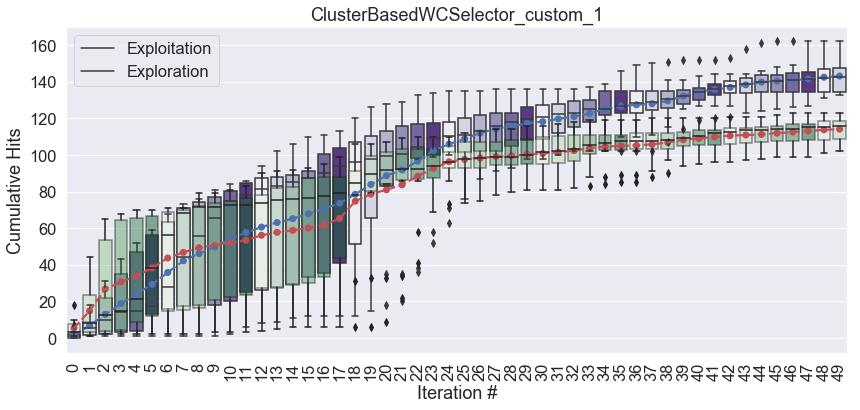

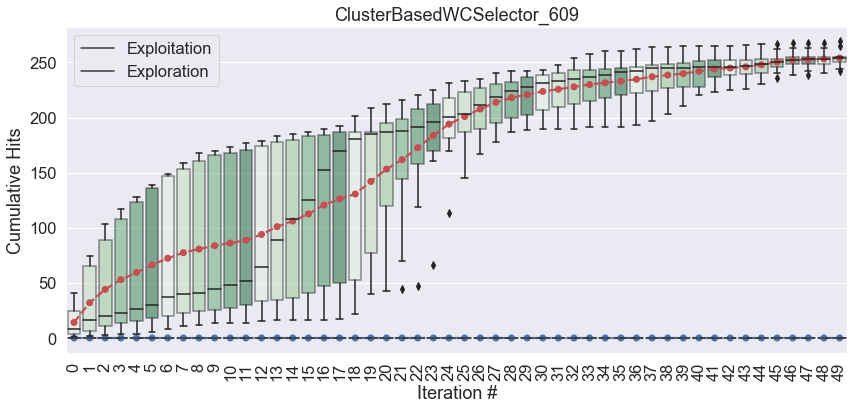

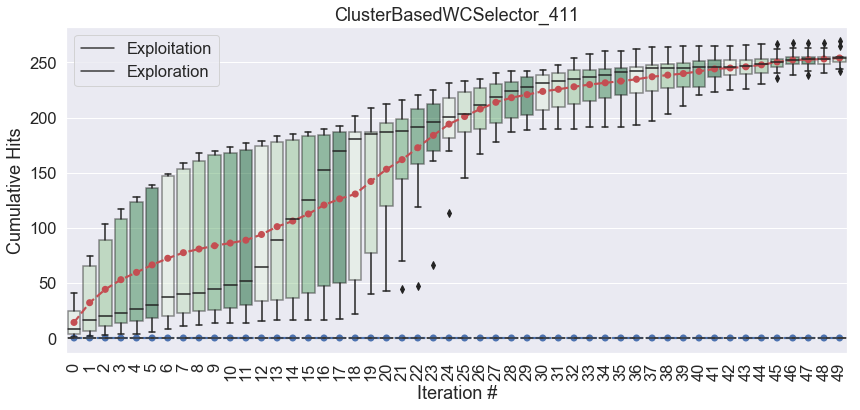

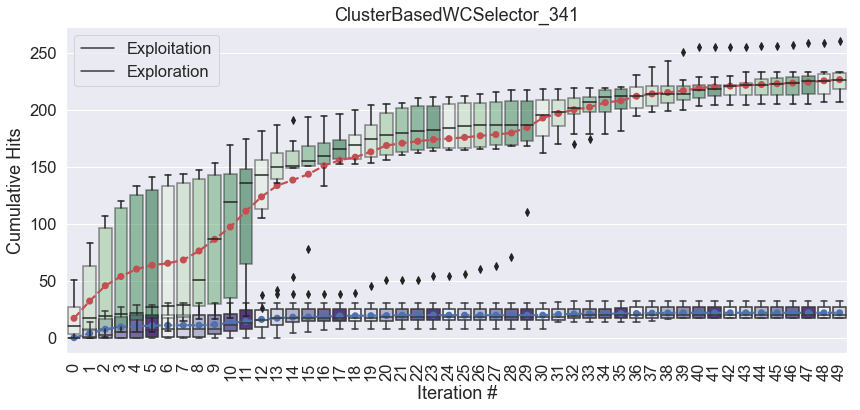

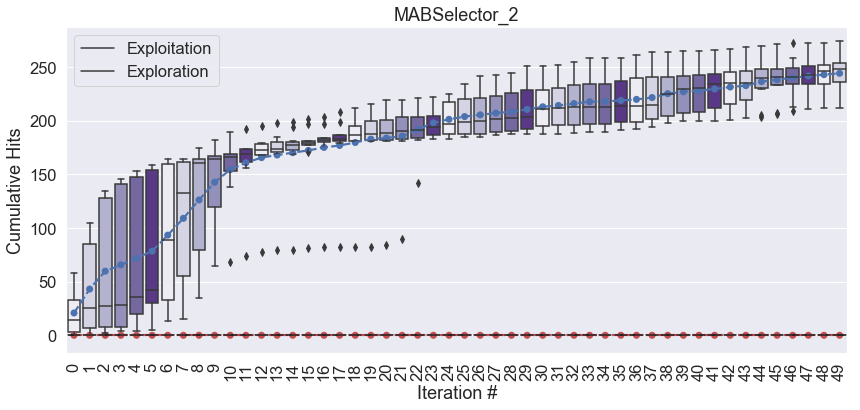

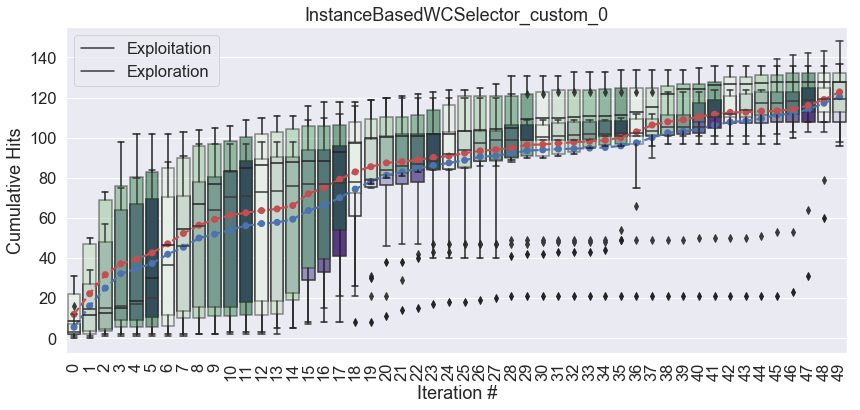

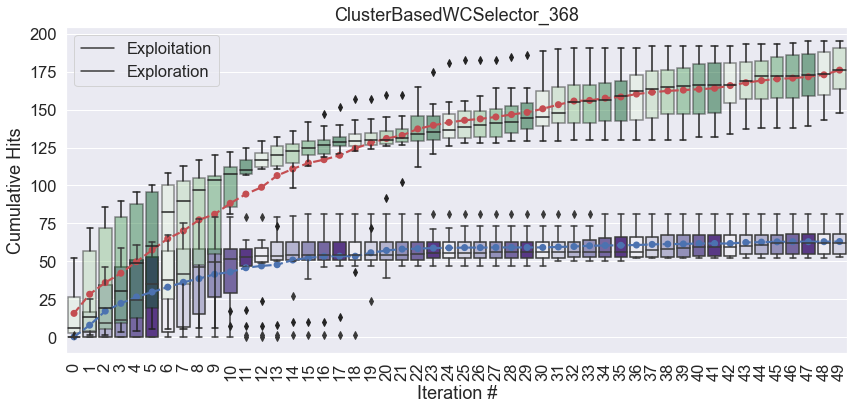

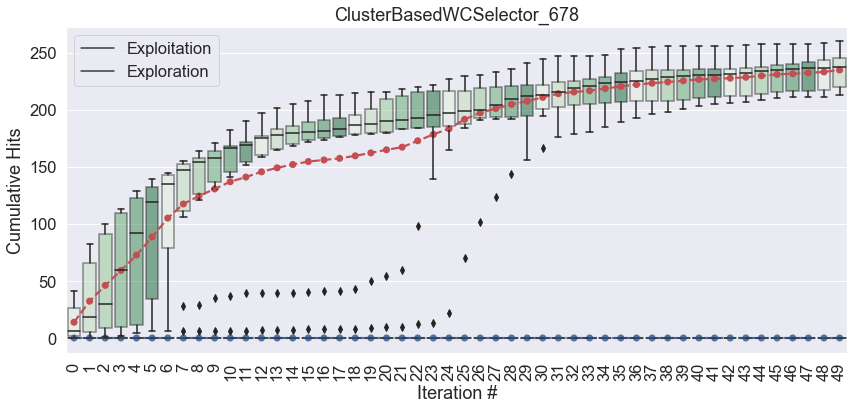

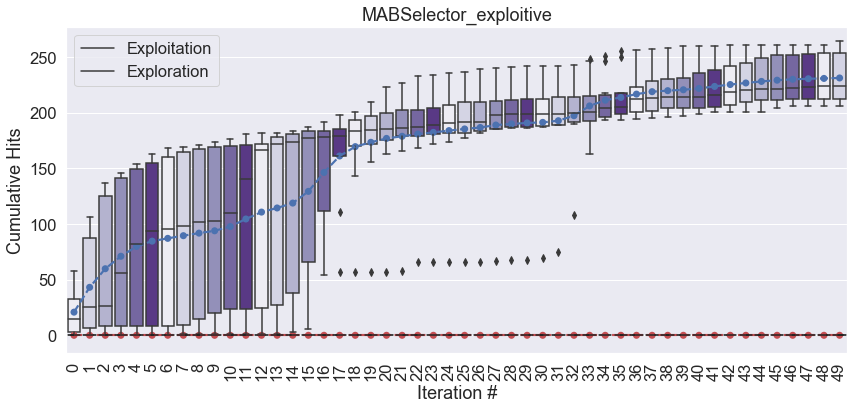

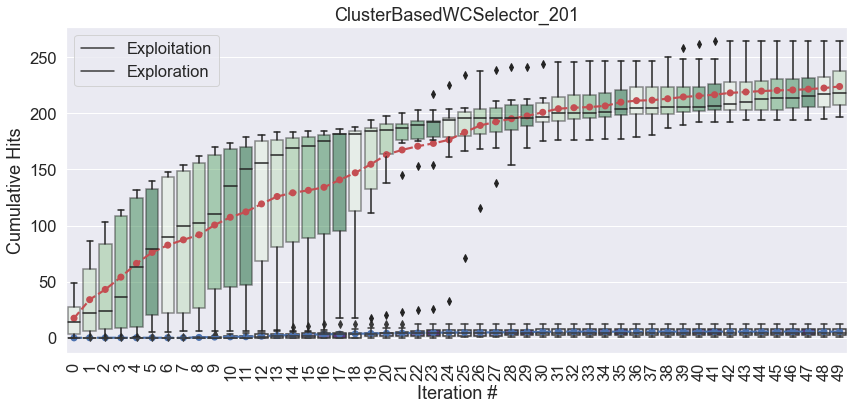

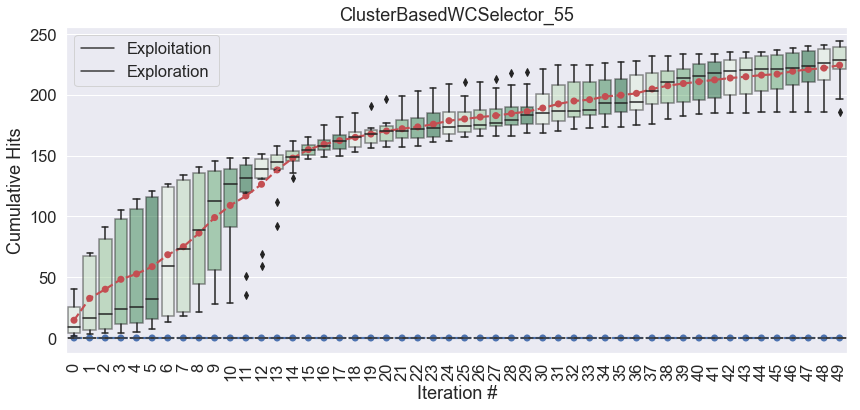

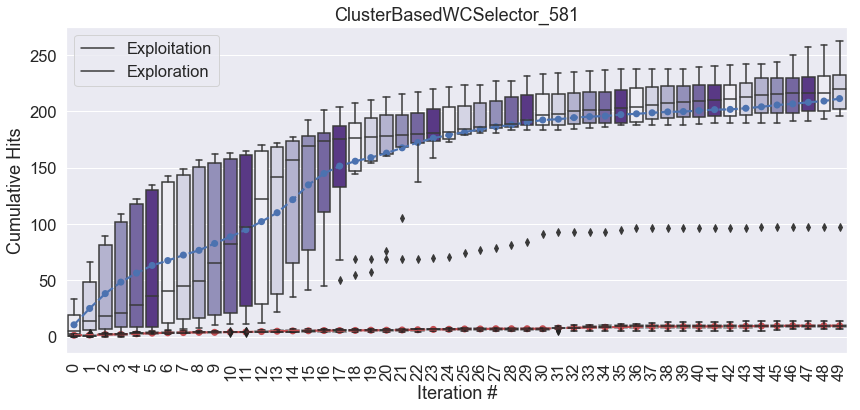

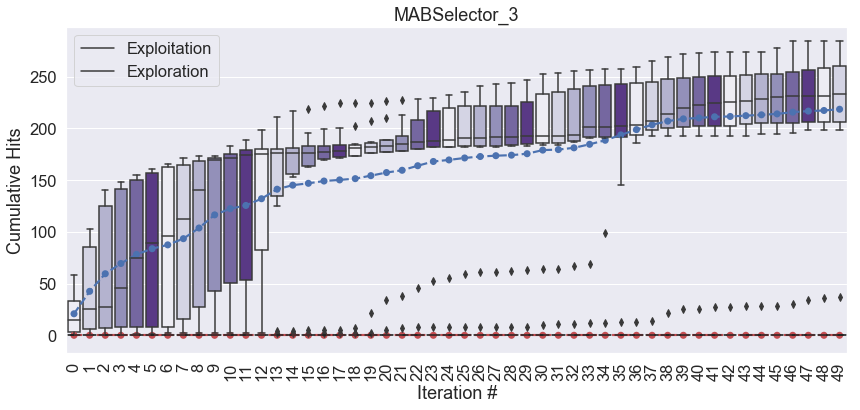

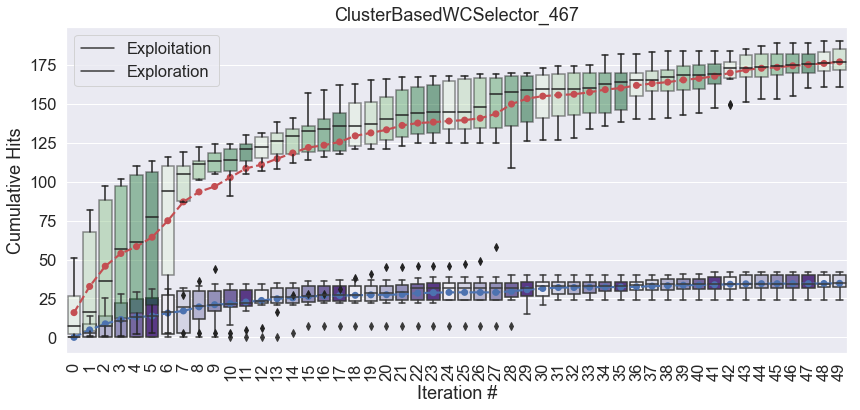

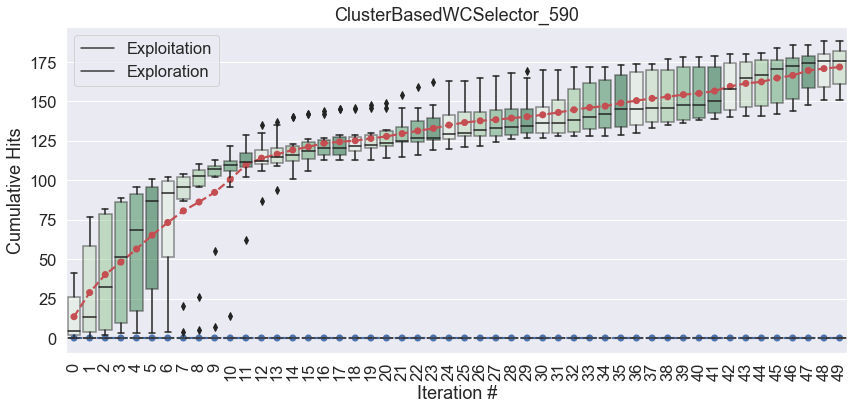

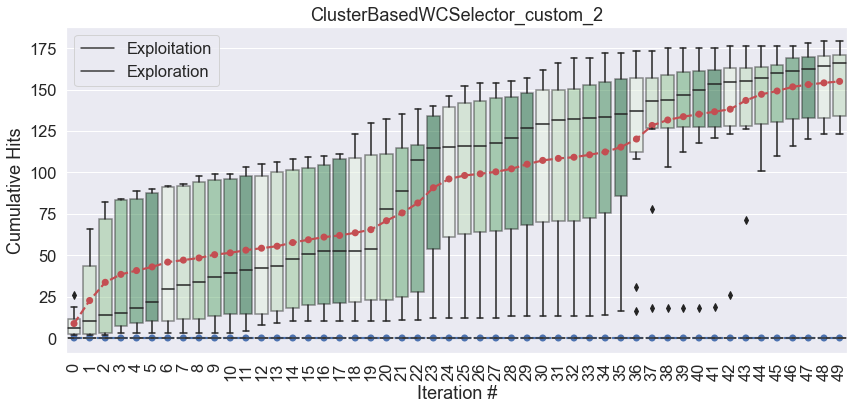

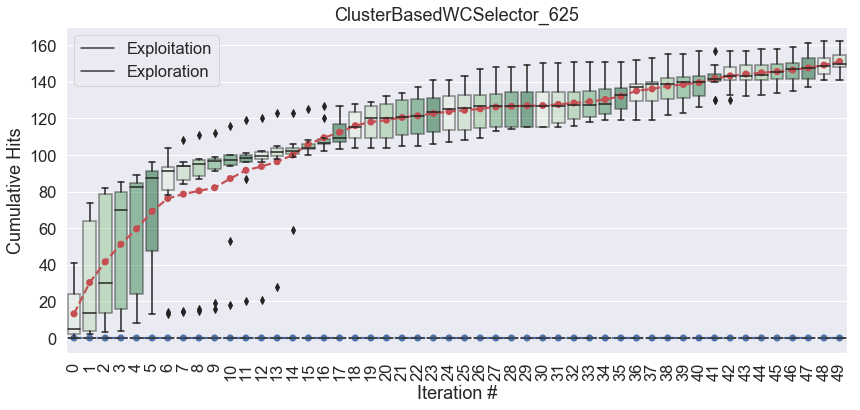

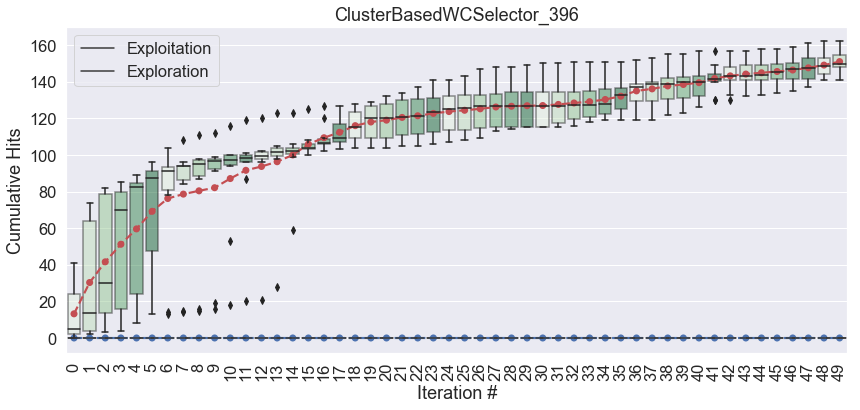

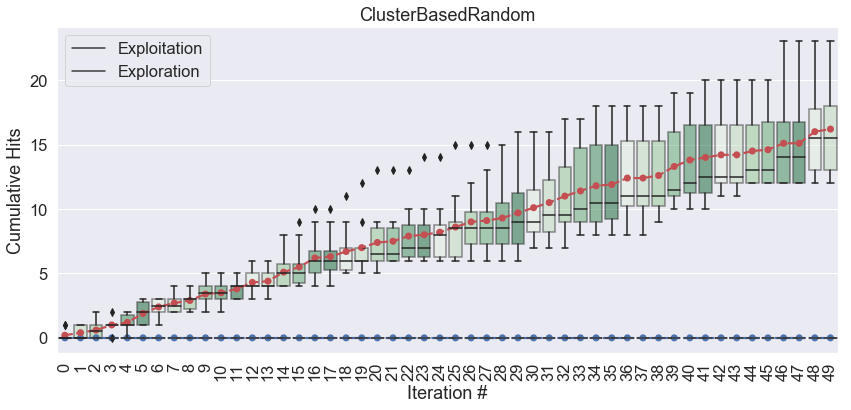

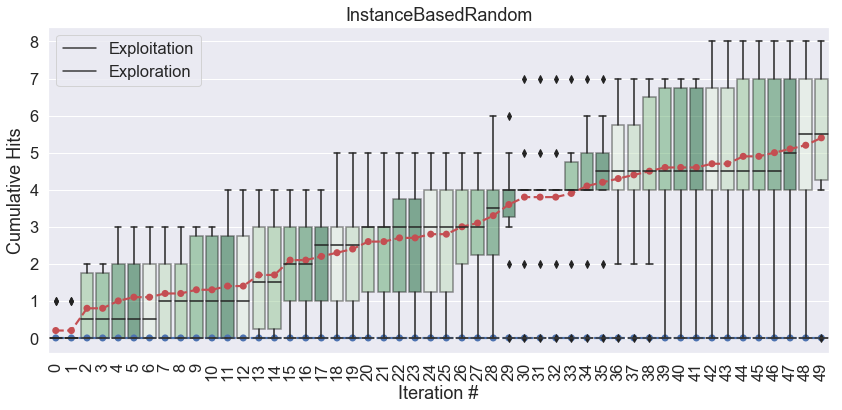

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_context("paper")
sns.set(font_scale=1.5)
figsize=(14, 6)

plot_max_min_runs = False
sorted_hid_list = sdf.index.tolist()
iter_df = cdf[cdf['iter_num'] != 9999]
for hid in sorted_hid_list:
    temp_df = iter_df[iter_df['hs_id'] == hid]
    run_list = []
    for rid in temp_df['rf_id'].unique():
        run_df = temp_df[temp_df['rf_id'] == rid].sort_values('iter_num')
        run_df['exploit_cumsum'] = run_df['exploitation_hits'].cumsum()
        run_df['explore_cumsum'] = run_df['exploration_hits'].cumsum()

        run_list.append(run_df)

    run_df = pd.concat(run_list)

    plt.figure(figsize=figsize)
    
    # exploitation
    sns.boxplot(data=run_df, x='iter_num', y='exploit_cumsum', palette=sns.color_palette("Purples"), boxprops=dict(alpha=1.0))
    sns.pointplot(data=run_df, x='iter_num', y='exploit_cumsum',  
                  linestyles='--', scale=0.8, color='b', errwidth=0, capsize=0)
    
    # exploration
    sns.boxplot(data=run_df, x='iter_num', y='explore_cumsum', palette=sns.color_palette("Greens"), boxprops=dict(alpha=.5))
    sns.pointplot(data=run_df, x='iter_num', y='explore_cumsum',  
                  linestyles='--', scale=0.8, color='r', errwidth=0, capsize=0)
    
    if plot_max_min_runs:
        # min-max exploitation
        x = run_df[run_df['iter_num'] == 49]
        max_hits = x.iloc[np.argmax(x['total_hits'].values),:]['rf_id']
        max_run = run_df[run_df['rf_id'] == max_hits]
        min_hits = x.iloc[np.argmin(x['total_hits'].values),:]['rf_id']
        min_run = run_df[run_df['rf_id'] == min_hits]

        sns.pointplot(data=max_run, x='iter_num', y='exploit_cumsum',  
                      linestyles='--', scale=0.8, color='b', errwidth=0, capsize=0)
        sns.pointplot(data=max_run, x='iter_num', y='exploit_cumsum',  
                      linestyles='--', scale=0.8, color='b', errwidth=0, capsize=0)

        # min-max exploration
        sns.pointplot(data=max_run, x='iter_num', y='explore_cumsum',  
                      linestyles='--', scale=0.8, color='r', errwidth=0, capsize=0)
        sns.pointplot(data=min_run, x='iter_num', y='explore_cumsum',  
                      linestyles='--', scale=0.8, color='r', errwidth=0, capsize=0)
    
    plt.xticks(rotation=90)
    plt.xlabel('Iteration #')
    plt.ylabel('Cumulative Hits')
    plt.legend(['Exploitation', 'Exploration'])
    plt.title(hid)
    plt.show()